$\textbf{Summary:}$
This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, GPA, quantifies students' overall grades on a scale from 0 to 4.0, with each letter grade corresponding to the following scale: A = 4.0, A- = 3.7, B+ = 3.3, B = 3.0, B- = 2.7, C+ = 2.3, C = 2.0, C- = 1.7, D+ = 1.3, D = 1.0, D- = 0.7, F = 0.0.

$\textbf{Dataset Details:}$

$\textbf{Age:}$ The age of the students ranges from 15 to 18 years.

$\textbf{Gender:}$ Gender of the students, where 0 represents Male and 1 represents Female.

$\textbf{Ethnicity:}$ The ethnicity of the students, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other

$\textbf{Parental Education:}$ The education level of the parents, coded as follows:
0: None
1: High School
2: Some College
3: Bachelor's
4: Higher

$\textbf{Study Time Weekly:}$ Weekly study time in hours, ranging from 0 to 20.

$\textbf{Absences:}$ Number of absences during the school year, ranging from 0 to 30.

$\textbf{Tutoring:}$ Tutoring status, where 0 indicates No and 1 indicates Yes.

$\textbf{Parental Support}$ The level of parental support, coded as follows:
0: None
1: Low
2: Moderate
3: High
4: Very High

$\textbf{Extracurricular:}$ Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.

Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.

Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.

Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

$\textbf{GPA:}$ Grade Point Average on a scale from 0.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.





$\textbf{Import Libraries}$

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import loguniform, randint

$\textbf{Importing Dataset}$

In [5]:
data = pd.read_csv("Student_performance_data_.csv")

$\textbf{Summary of Dataset}$

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [8]:
data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


$\textbf{Dropping Irrelevant Columns}$:
Here we are dropping Student ID because it simply identifies students and has no correlation with a students grade. Furthermore, we are removing the GradeClass feature as we are instead interested in predicting a student's GPA, and a Grade Class is not a commonly used metric. In addition, we are removing Age as this dataset is limited to high school students and we would like to generalize the model to all age ranges. 

In [10]:
data = data.drop(['StudentID','GradeClass','Age'],axis = 1)

$\textbf{Exploratory Data Analysis:}$

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Ethnicity'}>,
        <Axes: title={'center': 'ParentalEducation'}>],
       [<Axes: title={'center': 'StudyTimeWeekly'}>,
        <Axes: title={'center': 'Absences'}>,
        <Axes: title={'center': 'Tutoring'}>],
       [<Axes: title={'center': 'ParentalSupport'}>,
        <Axes: title={'center': 'Extracurricular'}>,
        <Axes: title={'center': 'Sports'}>],
       [<Axes: title={'center': 'Music'}>,
        <Axes: title={'center': 'Volunteering'}>,
        <Axes: title={'center': 'GPA'}>]], dtype=object)

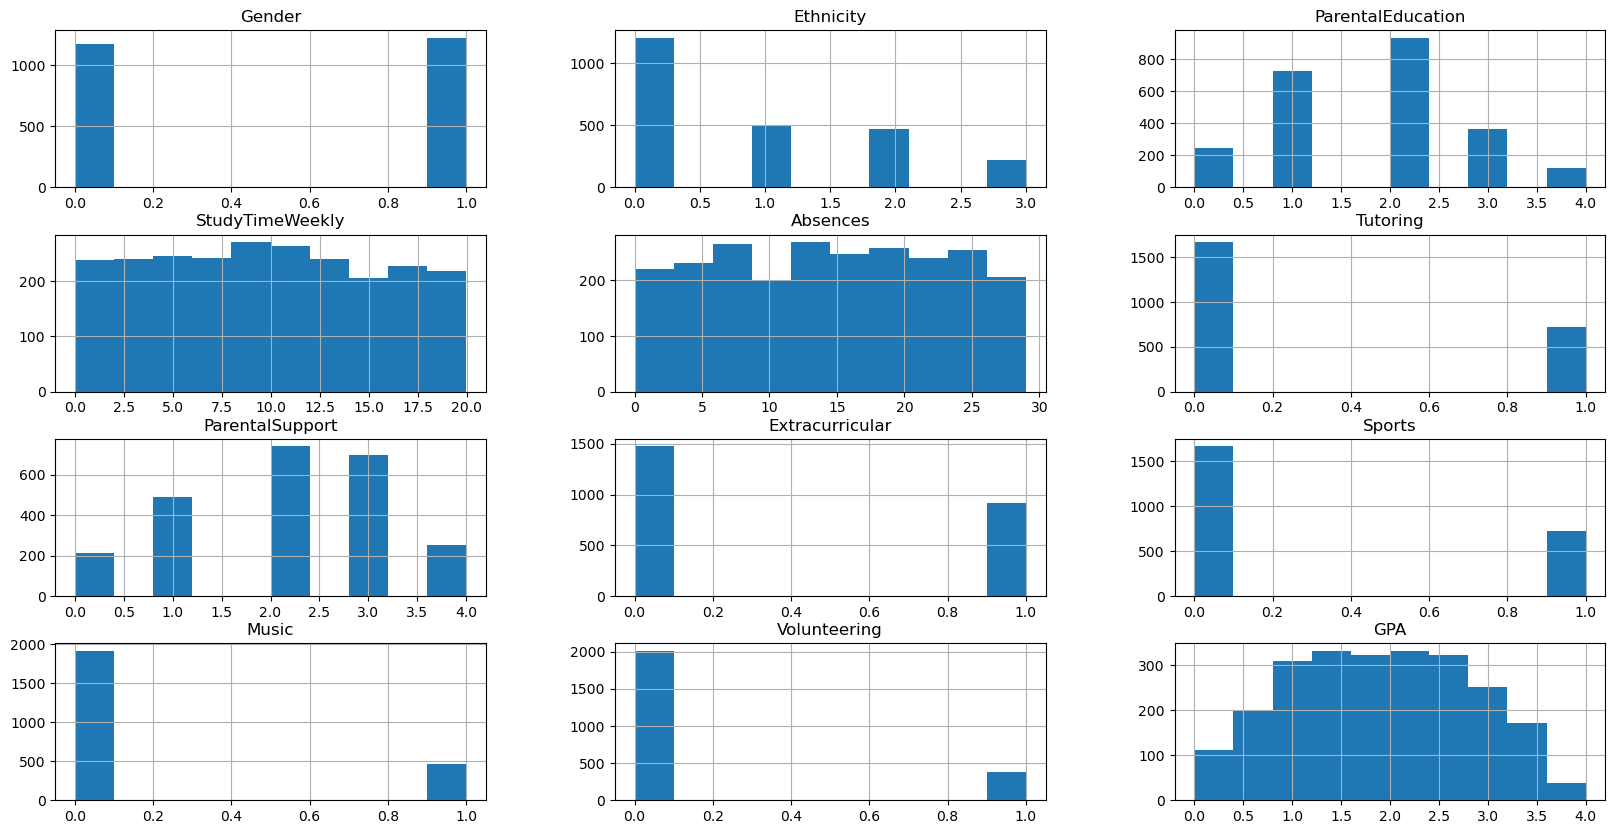

In [12]:
data.hist(figsize = (20,10))

$\textbf{Demographics:}$ From the histograms below, we can determine that there is an even split in genders, however an unequal distribution of ethnicities, with Caucasians being the most common, followed by African Americans, and then Asian Americans. The most common parental education level is some college, followed by high school and then bachelors.

$\textbf{Study Habits:}$ There appears to be a relatively uniform distribution of Weekly Study Time and absences which range from 0-20 hours and 0-29 absences respectively. However, only 30.14% of the students take part in tutoring. 

$\textbf{Parent Involvement:}$ Most student's parents have a parental support level of 2 or 3, corresponding to moderate and high levels of involvement. 

$\textbf{Extracurricular Activities:}$ Only 38.34% of students participate in extracurricular activities, with the most popular extracurricular being sports, followed by music, and then volunteering

$\textbf{GPA:}$ The average GPA of students in this dataset is 1.91 and appears normally distributed. It is to be noted that this average GPA is unusual with the average GPA of most institutions being close to 3.0. 

$\textbf{Bivariate Analysis:}$

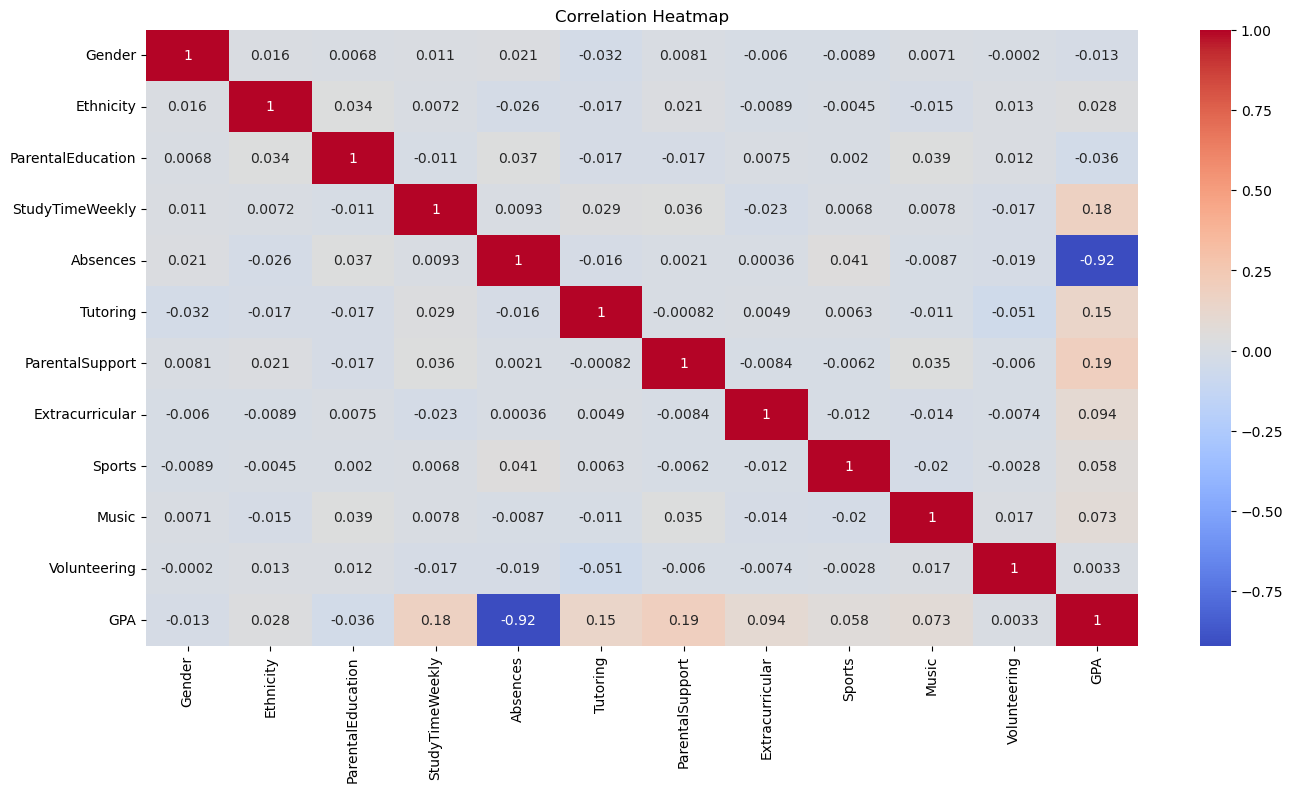

In [19]:
# Correlation Heatmap
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

From the above heatmap, we can see that absences appear to be very negatively correlated with GPA and Parental support, StudyTimeWeekly, and Tutoring being somewhat positively correlated. We explore these correlations further by plotting these features against GPA below: 

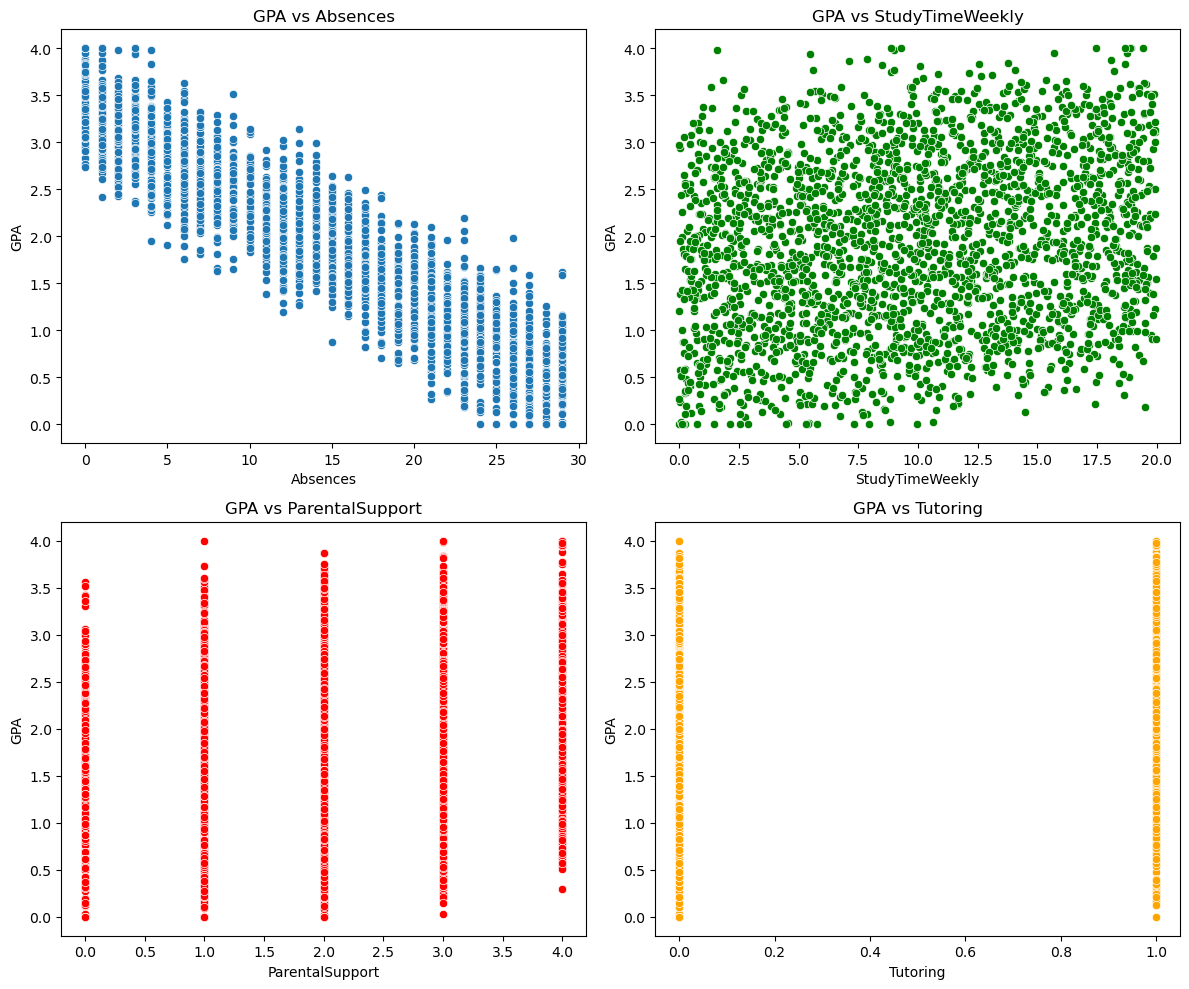

In [21]:
# Bivariate Analysis
fig, axs = plt.subplots(2,2, figsize=(12, 10))
sns.scatterplot(x='Absences', y='GPA', data=data, ax = axs[0,0])
axs[0, 0].set_title('GPA vs Absences')
sns.scatterplot(x='StudyTimeWeekly', y='GPA', data=data, ax = axs[0,1], color = 'green')
axs[0, 1].set_title('GPA vs StudyTimeWeekly')
sns.scatterplot(x='ParentalSupport', y='GPA', data=data, ax = axs[1,0], color = 'red')
axs[1, 0].set_title('GPA vs ParentalSupport')
sns.scatterplot(x='Tutoring', y='GPA', data=data, ax = axs[1,1], color = 'orange')
axs[1, 1].set_title('GPA vs Tutoring')
plt.tight_layout()

$\textbf{Sorting Numeric and Categorical Features}$

In [23]:
columns = list(data.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(data[i].unique()) > 5:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)
        
print('Numerical features: ', numeric_columns)
print('Categorical features: ', categoric_columns)

Numerical features:  ['StudyTimeWeekly', 'Absences', 'GPA']
Categorical features:  ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']


$\textbf{Label Encoding and Scaling Numerical Features:}$

In [25]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
for column in data[categoric_columns]:  
    data[column] = label_encoder.fit_transform(data[column])
    
# Standardize numerical features
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

$\textbf{Splitting Training and Testing Data:}$

In [27]:
X = data.drop(columns = ['GPA'])
y = data['GPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# List of models
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=1.0)),
    ('Elastic Net', ElasticNet(alpha=1.0, l1_ratio=0.5)),
    ('Support Vector Regression', SVR(kernel='linear', C=1.0, epsilon=0.1)),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=100)),
    ('Gradient Boosting Regression', GradientBoostingRegressor(n_estimators=100)),
    ('AdaBoost Regression', AdaBoostRegressor(n_estimators=100)),
    ('XGBoost', XGBRegressor(n_estimators=100)),
    ('CatBoost', CatBoostRegressor(n_estimators=100, verbose=0))
]

results = []

# Perform cross-validation for each model
for name, model in models:
    mse_scores = []
    r2_scores = []
    
    for train_index, test_index in kf.split(X_train):
        X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Train the model
        model.fit(X_train_cv, y_train_cv)
        
        # Make predictions
        y_pred = model.predict(X_test_cv)
       
        # Calculate metrics
        mse = mean_squared_error(y_test_cv, y_pred)
        r2 = r2_score(y_test_cv, y_pred)
        
        # Append the metrics to the lists
        mse_scores.append(mse)
        r2_scores.append(r2)
    
    # Calculate mean and standard deviation of the metrics
    mean_mse = np.mean(mse_scores)
    std_mse = np.std(mse_scores)
    mean_r2 = np.mean(r2_scores)
    std_r2 = np.std(r2_scores)
    
    # Store the results
    results.append({
        "Model": name,
        "Mean MSE": mean_mse,
        "Std MSE": std_mse,
        "Mean R^2": mean_r2,
        "Std R^2": std_r2
    })

results_df = pd.DataFrame(results)
results_df

,Model,Mean MSE,Std MSE,Mean R^2,Std R^2
0,Linear Regression,0.046534,0.005573,0.953103,0.006597
1,Ridge Regression,0.046534,0.005567,0.953103,0.006591
2,Lasso Regression,1.004156,0.065649,-0.006738,0.007038
3,Elastic Net,0.565268,0.044298,0.433765,0.008921
4,Support Vector Regression,0.046647,0.005486,0.953000,0.006452
5,Random Forest Regression,0.068866,0.005988,0.930439,0.009159
6,Gradient Boosting Regression,0.052421,0.005666,0.947108,0.007415
7,AdaBoost Regression,0.079579,0.007078,0.919730,0.010034
8,XGBoost,0.068679,0.006415,0.930737,0.008648
9,CatBoost,0.054218,0.005290,0.945428,0.006189


$\textbf{Selecting Best Performing Models:}$

In [30]:
results_df = results_df.drop([2,3,5,7,8,9])
results_df.index = results_df['Model']
results_df = results_df.drop(columns = ['Model'])
for i in range(2):
    models.pop(2)
models.pop(3)
for i in range(3):
    models.pop(-1)
results_df

,Mean MSE,Std MSE,Mean R^2,Std R^2
Model,,,,
Linear Regression,0.046534,0.005573,0.953103,0.006597
Ridge Regression,0.046534,0.005567,0.953103,0.006591
Support Vector Regression,0.046647,0.005486,0.953000,0.006452
Gradient Boosting Regression,0.052421,0.005666,0.947108,0.007415


$\textbf{Learning Curves:}$

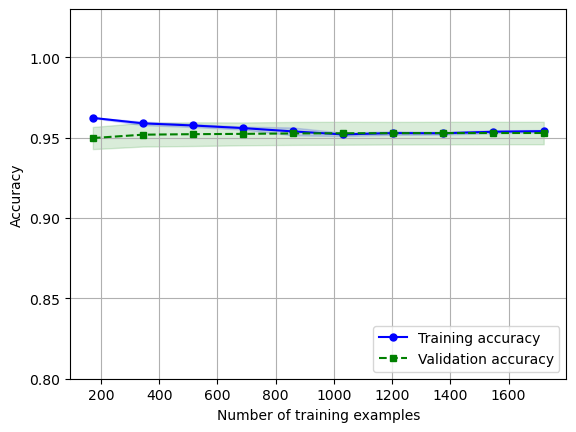

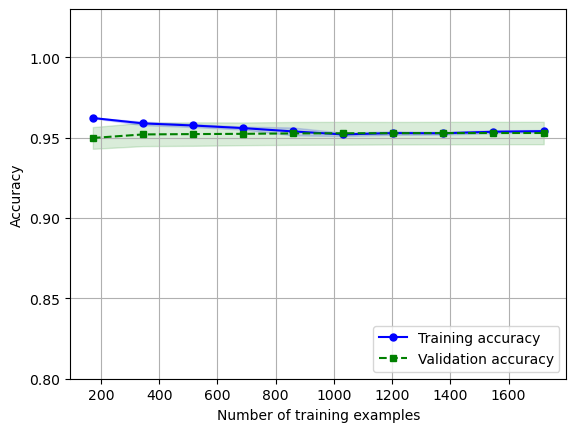

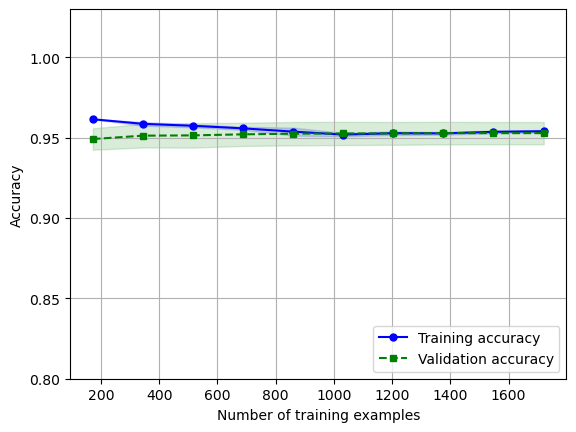

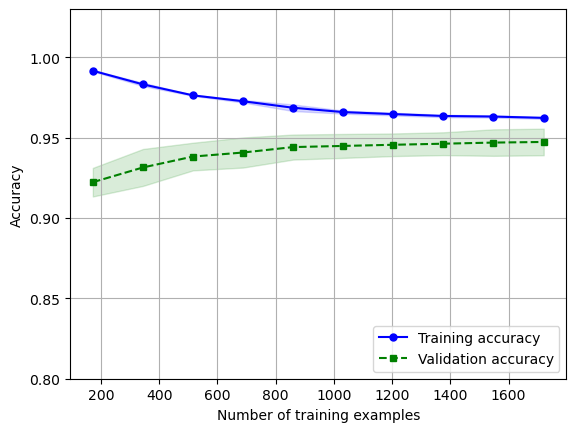

In [32]:
for name, model in models:
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10),cv=10, n_jobs=1) 
    train_mean = np.mean(train_scores, axis=1) 
    train_std = np.std(train_scores, axis=1) 
    test_mean = np.mean(test_scores, axis=1) 
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy') 
    plt.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,alpha=0.15, color='blue') 
    plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy') 
    plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green') 
    plt.grid()
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.8, 1.03])
    plt.show()

$\textbf{Tuning Hyperparameters}$

In [68]:
model = Ridge()

alpha_grid = {'alpha': np.logspace(-4, 4, 50)}
grid_search = GridSearchCV(estimator=model, param_grid=alpha_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# Use the best model to make predictions on the test set
best_ridge_model = grid_search.best_estimator_
y_pred = best_ridge_model.predict(X_test)

# Calculate R^2 
ridge_r2 = r2_score(y_test, y_pred)
print(f"R^2 on test set: {ridge_r2}")


Best alpha: 1.7575106248547894
R^2 on test set: 0.9532059450903492


In [35]:
# Define the model
model = SVR()

# Define hyperparameters grid
param_dist = {
    'kernel': ['linear'],
     'C': loguniform(1, 1e2),  # Log-uniform distribution between 0.01 and 100
    'epsilon': loguniform(1e-1, 1),  # Log-uniform distribution between 0.001 and 1
}

random_search = RandomizedSearchCV(model, param_dist, n_iter=20, cv=5, scoring='r2', random_state = 42)
random_search.fit(X_train, y_train)

# Best model and hyperparameters
best_svr_model = random_search.best_estimator_
print("Best SVR Hyperparameters:", random_search.best_params_)

# Predict and calculate R^2
y_pred = best_svr_model.predict(X_test)
svr_r2 = r2_score(y_test, y_pred)
print("R^2 on test set:", svr_r2)


Best SVR Hyperparameters: {'C': 15.304852121831463, 'epsilon': 0.1112885317490573, 'kernel': 'linear'}
R^2 on test set: 0.9529016130358853


In [36]:
# Define the model
model = GradientBoostingRegressor()

# Define hyperparameters distribution using log-uniform
param_dist = {
    'n_estimators': randint(100, 300),  # Discrete uniform distribution between 100 and 300
    'learning_rate': loguniform(1e-3, 1e-1),  # Log-uniform distribution between 0.001 and 0.1
    'max_depth': randint(3, 7),  # Discrete uniform distribution between 3 and 7
    'min_samples_split': randint(2, 10),  # Discrete uniform distribution between 2 and 10
    'min_samples_leaf': randint(1, 5)  # Discrete uniform distribution between 1 and 5
}

# Perform Randomized Search
random_search = RandomizedSearchCV(model, param_dist, n_iter=20, cv=10, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

# Best model and hyperparameters
best_gb_model = random_search.best_estimator_
print("Best Gradient Boosting Hyperparameters:", random_search.best_params_)

# Predict and calculate R^2
y_pred = best_gb_model.predict(X_test)
gb_r2 = r2_score(y_test, y_pred)
print("R^2 on test set:", gb_r2)



Best Gradient Boosting Hyperparameters: {'learning_rate': 0.045443839603360174, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 287}
R^2 on test set: 0.9439118544221524


After tuning hyperparameters for each of the well performing models, we find that the most optimal model is the Ridge Regression. 

$\textbf{Feature Importances:}$

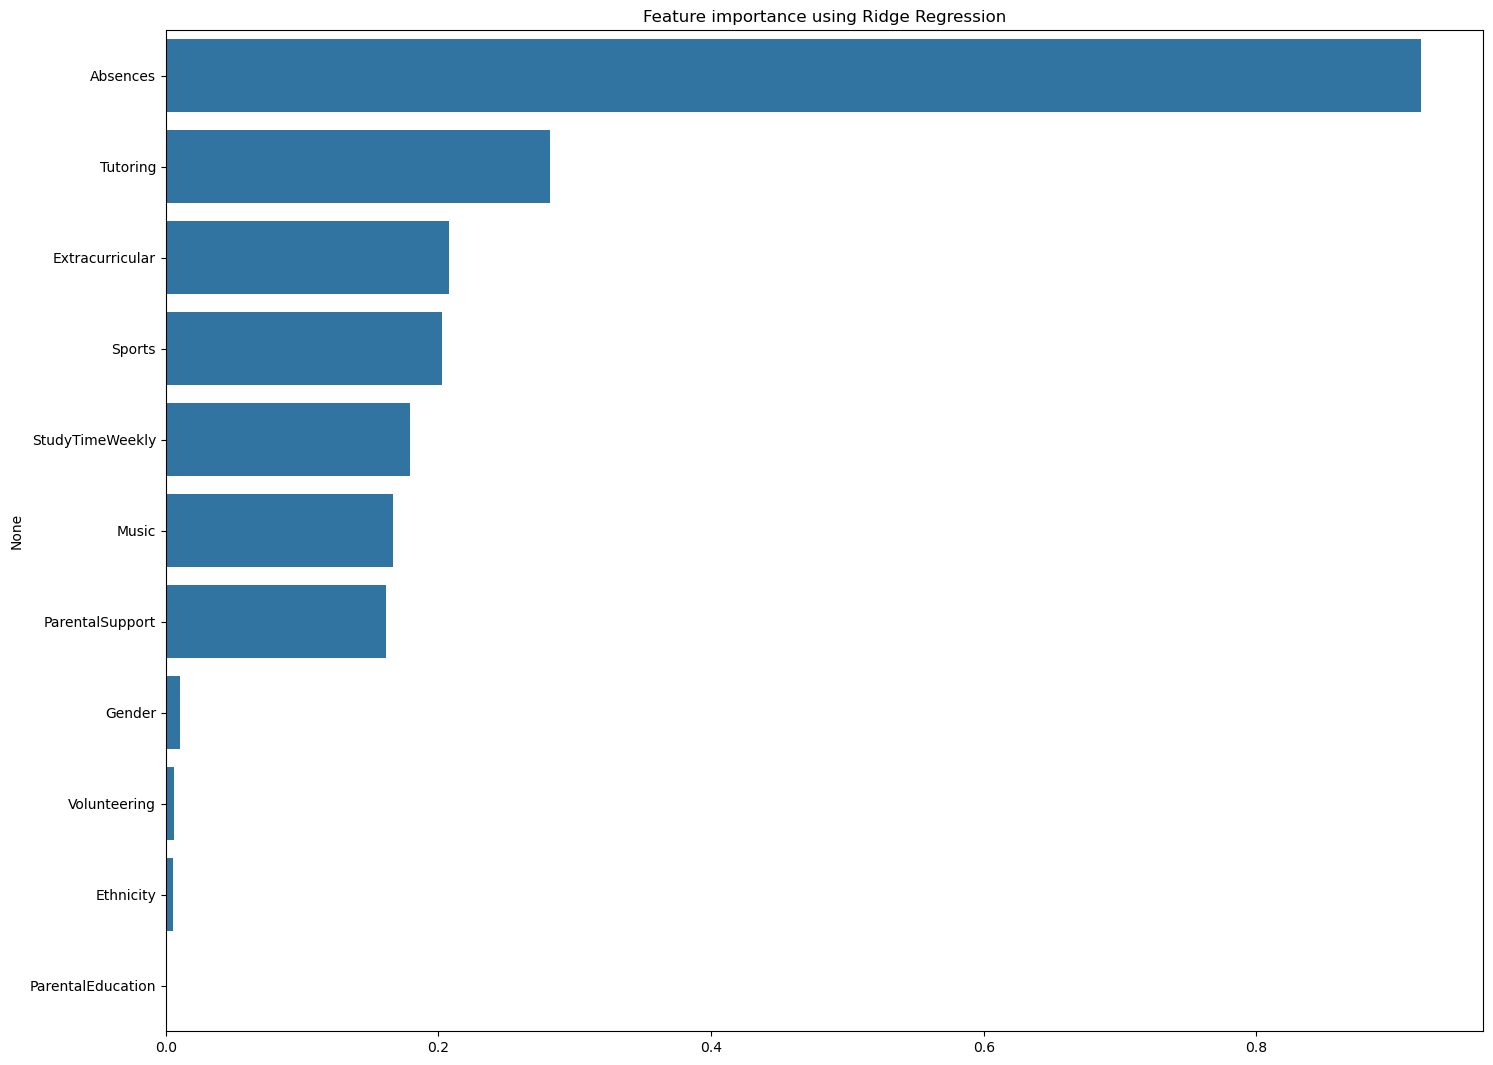

In [39]:
coeffs = best_ridge_model.coef_
imp = np.abs(coeffs)
fimp = pd.Series(data=imp, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(17,13))
plt.title("Feature importance using Ridge Regression")
ax = sns.barplot(y=fimp.index, x=fimp.values, orient='h')

$\textbf{Dropping Insignificant Features:}$

Based on our previous findings, we observe that the coefficients of Ethnicity, Gender, Volunteering, and Parental Education are significantly smaller in magnitude compared to those of the other features. Thus, for the sake of dimensionality reduction and reducing noise in our model, we will drop these features and observe the new performance.

In [42]:
X_train_reduced = X_train.drop(columns = ['Ethnicity','Gender', 'Volunteering', 'ParentalEducation'])
X_test_reduced = X_test.drop(columns = ['Ethnicity','Gender', 'Volunteering', 'ParentalEducation'])

$\textbf{Final Model:}$

In [44]:
final_ridge = Ridge(alpha = best_alpha)
final_ridge.fit(X_train_reduced, y_train)
y_pred = final_ridge.predict(X_test_reduced)
final_r2 = r2_score(y_test, y_pred)
print("R^2 on test set:", final_r2)
print('Difference in R^2: ', ridge_r2 - final_r2)

R^2 on test set: 0.9531116417757701
Difference in R^2:  0.00010127277101668053


Comparing this with the R^2 before we removed features, there is an insignificant difference in terms of variance explained by the model. 